<a href="https://colab.research.google.com/github/AndreyV80/NetStudy/blob/main/%D0%A0%D0%B0%D0%B1%D0%BE%D1%87%D0%B0%D1%8F_%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_%D0%94%D0%B8%D0%BF%D0%A0%D0%B0%D0%B1_ipynb___(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas-profiling==2.7.1


  Created wheel for phik: filename=phik-0.11.2-py3-none-any.whl size=1107420 sha256=b1661a0d6fb0640a67a4555c9edfd8e8c7a28dedda885b1d8e294d90163f0dca
  Stored in directory: c:\users\it\appdata\local\pip\cache\wheels\72\9a\23\097c93fd8341220d92674891b6a9a30f0e389719d9b7291bd2
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27091 sha256=7d491bf3814d2c5494143d324e360c6a05ebac840f0d118b2d42affaef2d119b
  Stored in directory: c:\users\it\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built phik htmlmin


In [1]:
import pandas as pd
import numpy as np
import pandas_profiling

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm as cm

In [2]:
import os, time
from google.colab import drive

In [3]:
drive.mount('/content/drive') 

Mounted at /content/drive


**1. Загрузка данных**

In [4]:
HR = pd.read_csv('/content/drive/My Drive/HR.csv', sep = ',')        #, sep = ',', names=headers2, na_values='?') # na_values='?' - заменяем пропуски на NaN

1. уровень удовлетворенности работой
2. последняя оценка
3. номер проекта
4. среднемесячные часы
5. Стаж в годах
6. Несчастный случай на работе
7. Увольнение
8. продвижение последние 5 лет
9. отдел
10. зарплата

**2. Расчет основных статистик**

In [ ]:
HR.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
pandas_profiling.ProfileReport(HR)

**3. Расчет и визуализация корреляционной матрицы для количественных переменных**

3.1 Создадим рабочую копию

In [5]:
HR_test = HR.copy() 

3.2 Переведем данные столбцов "department" и "salary" в тип 'category'

In [6]:
HR_test.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [7]:
HR_test = HR_test.astype({'average_montly_hours':'float', 'time_spend_company':'float', 'Work_accident':'float', 'left':'float',
       'promotion_last_5years':'float','department':'category', 'salary':'category', 'number_project':'float'}, copy=True)

In [ ]:
HR_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  float64 
 3   average_montly_hours   14999 non-null  float64 
 4   time_spend_company     14999 non-null  float64 
 5   Work_accident          14999 non-null  float64 
 6   left                   14999 non-null  float64 
 7   promotion_last_5years  14999 non-null  float64 
 8   department             14999 non-null  category
 9   salary                 14999 non-null  category
dtypes: category(2), float64(8)
memory usage: 967.3 KB


3.3 Сформируем корреляционную матрицу

In [8]:
HR_test_corr = HR_test.corr()

Визуализируем ее в виде "тепловой карты"

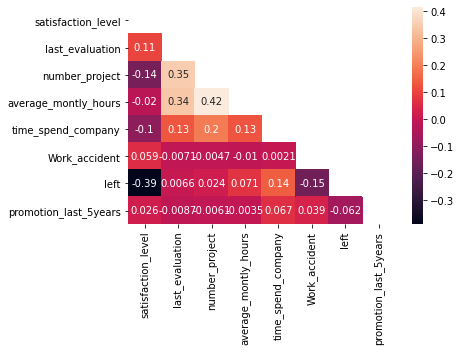

In [9]:
matrix = np.triu(HR_test_corr)
sns.heatmap(HR_test_corr, annot=True, mask=matrix)

**Вывод**:
1. Как видим наиболее скоррелированные данные между показателями last_evaluation (Время с последней оценки в годах) - average_montly_hours (среднемесячные часы), time_spend_company (Стаж)- last_evaluation / average_montly_hours.
2. Наименее скоррелированные данные между показателями satisfaction_level (Уровень удовлетворенности работой) и left (увольнение работника), т.е., по -моему низкий уровень удовлетворенности работой ведет к увольнению. А также виделил бы соотношение Work_accident (несчастные случаи) и причину увольнения (left)

**4. Расчет количества сотрудников в каждом департаменте (отделе)**

4.1 Выделим отдельный датафрейм с работающими сотрудниками

Предположим, что в столбце "left" за "1" принято уволившиеся сотрудники (в условии задачи это не указано), за "0" - работающие

In [10]:
# for key, value in HR_test['department'].unique().items():
HR_test_work = HR_test[HR_test.left == 0]    #.value_counts().to_frame() # Посчет значений в столбце "Отдел"

HR_test_work.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4.0,215.0,3.0,0.0,0.0,0.0,sales,low
2001,0.82,0.67,2.0,202.0,3.0,0.0,0.0,0.0,sales,low
2002,0.45,0.69,5.0,193.0,3.0,0.0,0.0,0.0,sales,low
2003,0.78,0.82,5.0,247.0,3.0,0.0,0.0,0.0,sales,low
2004,0.49,0.60,3.0,214.0,2.0,0.0,0.0,0.0,sales,low


Поскольку датафрейм содержит записи по каждому отдельно сотруднику, можно предположить, что количество повторов названий отделов соответствует количеству сотрудников в них

In [ ]:
HR_test_work.department.value_counts()

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: department, dtype: int64

<function matplotlib.pyplot.show>

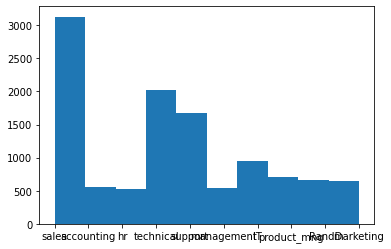

<Figure size 1152x648 with 0 Axes>

In [ ]:
plt.hist(HR_test_work['department'])    #проба
plt.figure(figsize=(16,9))
plt.show

**5. Распределение сотрудников по зарплатам**

In [11]:
HR_test_work.loc[(HR_test_work.salary == 'low'), 'id_salary'] = 1 
HR_test_work.loc[(HR_test_work.salary == 'medium'), 'id_salary'] = 2 
HR_test_work.loc[(HR_test_work.salary == 'high'), 'id_salary'] = 3 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Расчет количества сотрудников, получающие соответствующие категорию зарплаты

In [ ]:
HR_test_work.salary.value_counts()

low       5144
medium    5129
high      1155
Name: salary, dtype: int64

Распределение зарплат между сотрудниками

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Распределение зарплат между сотрудниками')

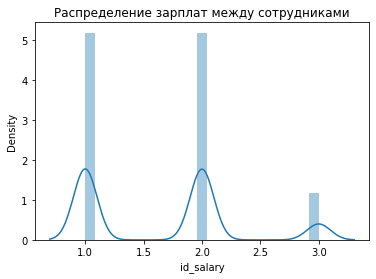

In [12]:
ax = sns.distplot(HR_test_work.id_salary)
ax.set_title('Распределение зарплат между сотрудниками')

**6. Распределение сотрудников по зарплатам в каждом департаменте по отдельности**

Создадим сводную таблицу в разрезе отделов и уровней зарплат.

In [13]:
Pivot = HR_test_work[['department', 'salary', 'id_salary']].pivot_table(values='id_salary', index='department', columns='salary', aggfunc='count')

In [ ]:
Pivot

salary,high,low,medium
department,,,
IT,79,437,438
RandD,47,309,310
accounting,69,259,235
hr,39,243,242
management,224,121,194
marketing,71,276,308
product_mng,62,346,296
sales,255,1402,1469
support,133,757,784


Визуализируем полученные данные 

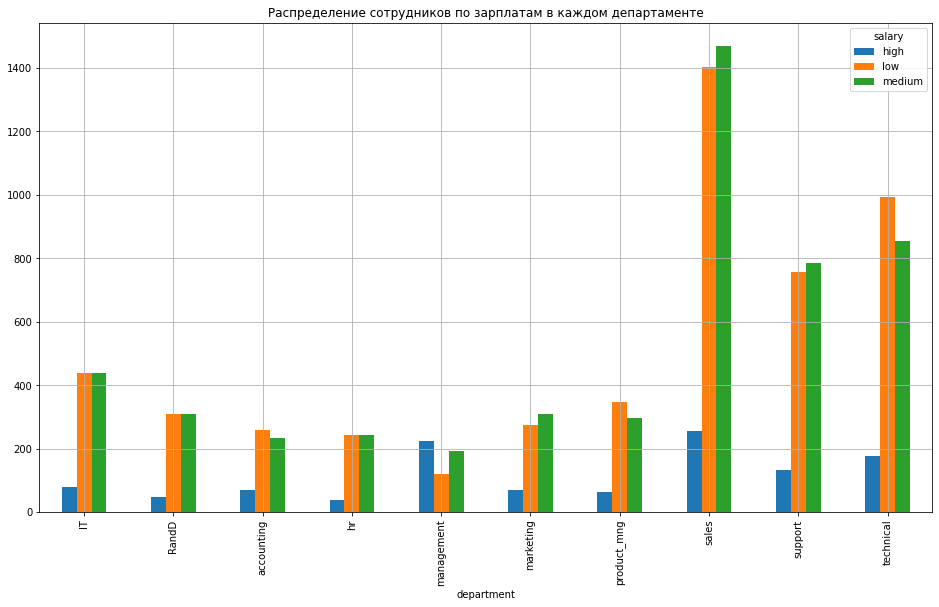

In [ ]:

Pivot.plot(kind='bar', rot=90,figsize=(16,9), title='Распределение сотрудников по зарплатам в каждом департаменте', grid=True)

# plt.show()

Вывод: как видим наибольшее количество сотрудников, получающих высокую зарплату, работабт в отделе менеджмента. В остальных отделах практически равномерно распределено количество сотрудников, получающих малую и среднею зарплату

**7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом**

Решил сформировать сводную таблицу, группируя по показателям "salary", медиане времени нахождения на работе. Пробывал по средней - показатели относительно теже

In [14]:
HR_test_Gip = HR_test_work[['average_montly_hours', 'salary', 'id_salary']].groupby(['salary']).median().sort_values(by='average_montly_hours', ascending=False)

In [ ]:
HR_test_Gip

,average_montly_hours,id_salary
salary,,
high,201.0,3.0
medium,199.0,2.0
low,197.0,1.0


Вывод: Поскольку расхождения по данным минимальны, можно предположить что исследуемые категории работников проводят в среднем  одинаковое время на работе

**8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):**
- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов

In [15]:
HR_test_NoWork = HR_test[HR_test.left == 1] #выделим данные по уволившимся сотрудникам в отдельный датафрейм


In [16]:
HR_test_NoWork.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2.0,157.0,3.0,0.0,1.0,0.0,sales,low
1,0.80,0.86,5.0,262.0,6.0,0.0,1.0,0.0,sales,medium
2,0.11,0.88,7.0,272.0,4.0,0.0,1.0,0.0,sales,medium
3,0.72,0.87,5.0,223.0,5.0,0.0,1.0,0.0,sales,low
4,0.37,0.52,2.0,159.0,3.0,0.0,1.0,0.0,sales,low


In [18]:
HR_test_NoWork['promotion_last_5years'].describe()

count    3571.000000
mean        0.005321
std         0.072759
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: promotion_last_5years, dtype: float64

8.1 Расчистаем долю сотрудников с повышением за последние 5 лет. С учетом расчета базовых статистик по столбцу 'promotion_last_5years' предположим, что значение "1" в столбце 'promotion_last_5years' означает соответствующее повышение, тип данных - "float". Соответственно, можно взять сумму значений по столбцу и разделить его на общее количество его значений

In [37]:
fractionNoWork= HR_test_NoWork['promotion_last_5years'].sum() / HR_test_NoWork['promotion_last_5years'].count() * 100

fractionWork = HR_test_work['promotion_last_5years'].sum() / HR_test_work['promotion_last_5years'].count() * 100

In [52]:
print("Доля из числа уволившихся сотрудников с повышением за последние 5 лет составляет: ", fractionNoWork.round(1), "%",'\n',
      "Доля из числа работающих сотрудников с повышением за последние 5 лет составляет: ", fractionWork.round(1), "%", sep='')



Доля из числа уволившихся сотрудников с повышением за последние 5 лет составляет: 0.5%
Доля из числа работающих сотрудников с повышением за последние 5 лет составляет: 2.6%


8.2 Средняя степень удовлетворенности работой

In [54]:
HR_test_NoWork['satisfaction_level'].describe()

count    3571.000000
mean        0.440098
std         0.263933
min         0.090000
25%         0.130000
50%         0.410000
75%         0.730000
max         0.920000
Name: satisfaction_level, dtype: float64

In [74]:
HR_test_work['satisfaction_level'].describe()

count    11428.000000
mean         0.666810
std          0.217104
min          0.120000
25%          0.540000
50%          0.690000
75%          0.840000
max          1.000000
Name: satisfaction_level, dtype: float64

In [61]:
workNo = HR_test_NoWork['satisfaction_level'].mean()
workYes = HR_test_work['satisfaction_level'].mean()

In [73]:
print(f"Средняя степень удовлетворенности работой уволившихся сотрудников составляет: {workNo:.2f}\nСредняя степень удовлетворенности работой работающих сотрудников составляет: {workYes:.2f}")

Средняя степень удовлетворенности работой уволившихся сотрудников составляет: 0.44
Средняя степень удовлетворенности работой работающих сотрудников составляет: 0.67


8.3 Среднее количество проектов

In [ ]:
HR_test_NoWork['number_project'].describe()

In [ ]:
HR_test_work['number_project'].describe()

Решил взять за средний показатель медиану

In [47]:
projectNoWork= HR_test_NoWork['number_project'].median()

projectWork = HR_test_work['number_project'].median()

In [53]:
print("Среднее количество проектов уволившихся сотрудников составляет: ", projectNoWork,'\n',
      "Среднее количество проектов работающих сотрудников составляет: ", projectWork, sep='')

Среднее количество проектов уволившихся сотрудников составляет: 4.0
Среднее количество проектов работающих сотрудников составляет: 4.0


**9. Разделить данные на тестовую и обучающую выборкиПостроить модель LDA, предсказывающую уволился лисотрудник на основе имеющихся факторов (кроме department иsalary)Оценить качество модели на тестовой выборки**

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [76]:
HR_test.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [77]:
X, y = HR_test[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours','time_spend_company', 'Work_accident', 'promotion_last_5years']], HR_test['left']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
865,0.82,0.85,5.0,218.0,5.0,0.0,0.0
8438,0.59,0.45,2.0,171.0,2.0,0.0,0.0
1165,0.10,0.96,6.0,303.0,4.0,0.0,0.0
5239,0.93,0.97,5.0,255.0,4.0,0.0,0.0
12984,0.95,0.53,3.0,264.0,3.0,0.0,0.0


In [79]:
model = LogisticRegression()

In [80]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
# Оцениваем качество
from sklearn.metrics import accuracy_score

In [82]:
# Оцениваем качество на выборке для обучения
accuracy_score(y_train, model.predict(X_train))

0.7638969914159514

In [83]:
# Оцениваем качество на выборке для тестирования
accuracy_score(y_test, model.predict(X_test))

0.7593333333333333

**Применим модель DecisionTreeClassifier**

Как понимаю, это дерево решений

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
model = DecisionTreeClassifier()

In [86]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [87]:
accuracy_score(y_train, model.predict(X_train))

0.9998333194432869

In [88]:
accuracy_score(y_test, model.predict(X_test))

0.9786666666666667

В обоих случаях расхождения не большие. Для полноценной оценки качества не хватает знаний.